Exercise 3: Clustering

#Anwr Sied Ahmd
 #206710212
 #https://github.com/anwr98/learning_machine.git

1. Function to create synthetic data - please do not change


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

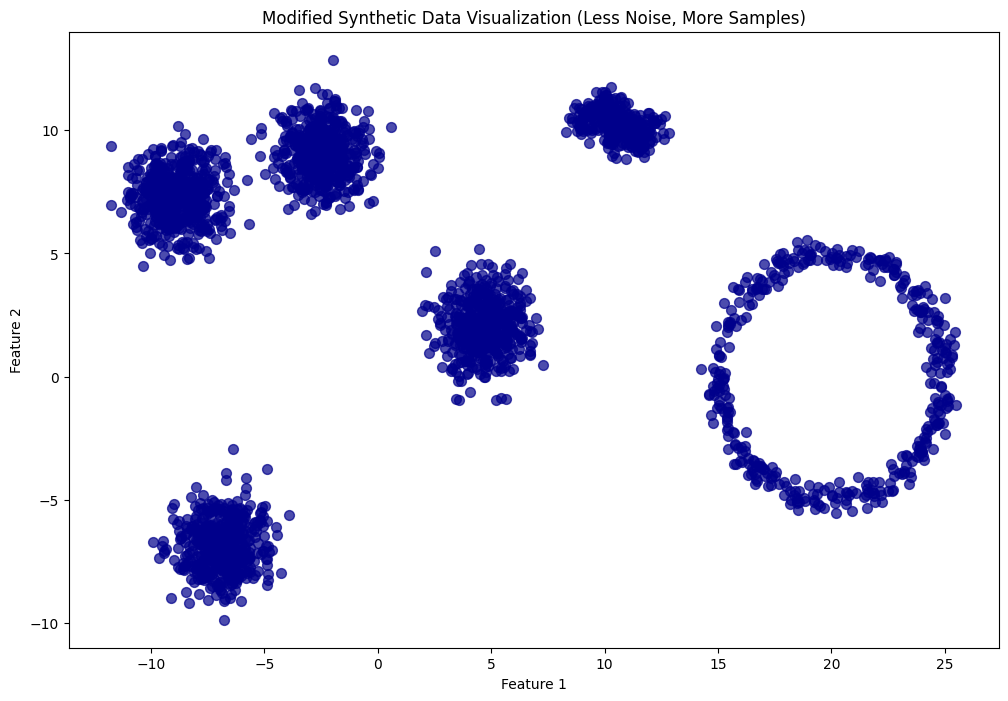

In [ ]:
X = create_data(0.3, 2000, 300, 400, 1000)

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], s=50, color='darkblue', alpha=0.7)
plt.title("Modified Synthetic Data Visualization (Less Noise, More Samples)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

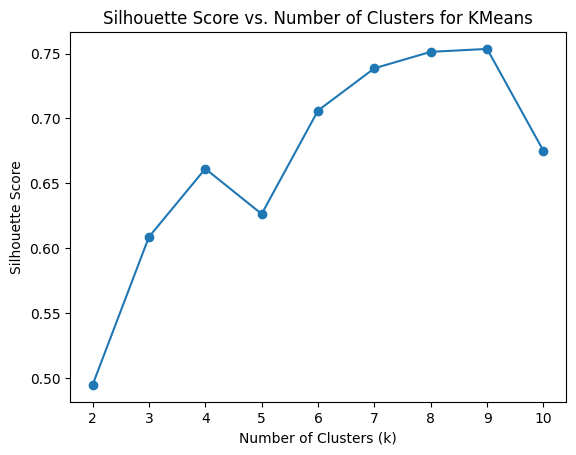

The optimal number of clusters is: 9


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# מספרים שונים של אשכולות לבדוק
k_values = range(2, 11)  # בודקים בין 2 ל-10 אשכולות
silhouette_scores = []

# חישוב Silhouette Score עבור כל ערך של k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# הצגת התוצאות
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters for KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# הדפסת מספר האשכולות האופטימלי
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_k}")


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

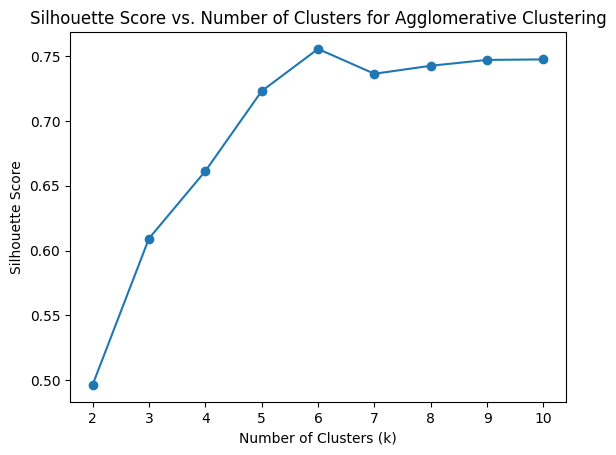

The optimal number of clusters is: 6


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# מספרים שונים של אשכולות לבדוק
k_values = range(2, 11)  # נבדוק בין 2 ל-10 אשכולות
silhouette_scores = []

# חישוב Silhouette Score עבור כל ערך של k
for k in k_values:
    agg_clust = AgglomerativeClustering(n_clusters=k)
    labels = agg_clust.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# הצגת התוצאות
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters for Agglomerative Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# הדפסת מספר האשכולות האופטימלי
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_k}")


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


Best Silhouette Score: 0.7230126060091746
Best eps: 1.4, Best min_samples: 3


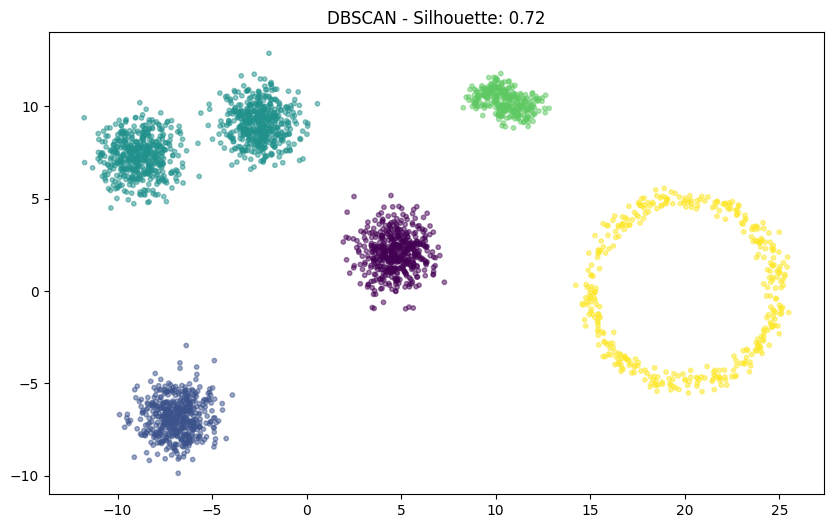

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# חיפוש אופטימיזציה של eps ו-min_samples
eps_values = np.linspace(0.1, 2.0, 20)  # range for epsilon (eps)
min_samples_values = range(3, 11)  # range for min_samples

best_score = -1  # נתחיל ממדד שלילית
best_eps = 0
best_min_samples = 0
best_labels = None

# חיפוש אחרי הערכים האופטימליים
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # ודא שאין רעש (labels=-1) וחשב Silhouette score רק אם יש אשכולות תקניים
        if len(set(labels)) > 1 and -1 not in labels:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

# הצגת התוצאה
print(f"Best Silhouette Score: {best_score}")
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")

# הצגת האשכולות בגרף פיזור
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', s=10, alpha=0.5)
plt.title(f"DBSCAN - Silhouette: {best_score:.2f}")
plt.show()

6. Compare the results and choose the best method for the data


KMeans Silhouette Score: 0.7060778632974658
Agglomerative Clustering Silhouette Score: 0.7555585669877418
DBSCAN Silhouette Score: 0.7230126060091746
The best method based on Silhouette Score is: Agglomerative Clustering


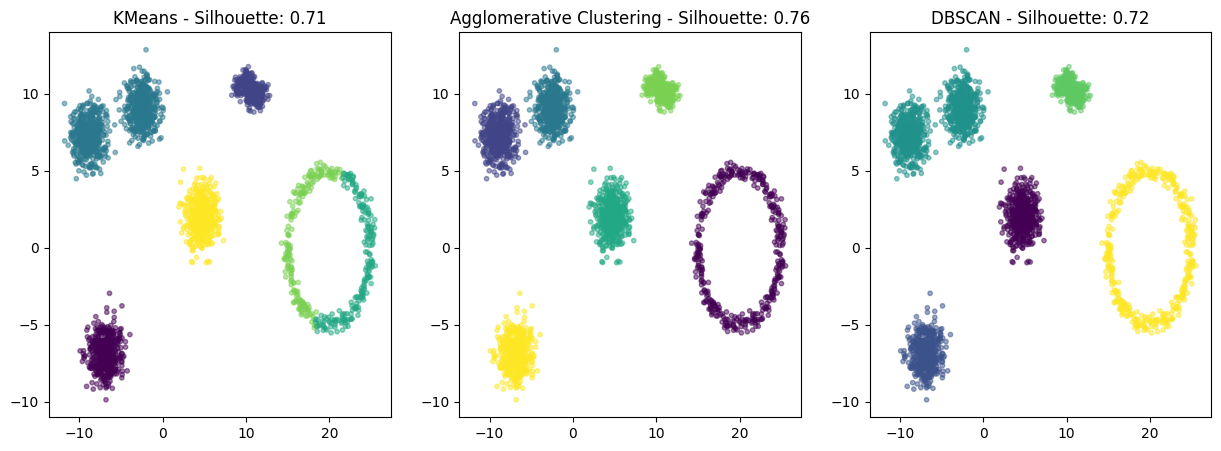

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

# Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clust.fit_predict(X)
agg_silhouette_score = silhouette_score(X, agg_labels)

# DBSCAN (באופן אוטומטי מצאנו את הערכים האופטימליים של eps ו-min_samples)
if best_eps > 0:
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan_labels = dbscan.fit_predict(X)

    # אם יש רעש ב-DBSCAN, לא מחשבים את ה-Silhouette Score
    if -1 not in dbscan_labels:
        dbscan_silhouette_score = silhouette_score(X, dbscan_labels)
        dbscan_result_valid = True
    else:
        dbscan_silhouette_score = -1  # DBSCAN לא הצליח לזהות אשכולות תקניים
        dbscan_result_valid = False
else:
    dbscan_silhouette_score = -1
    dbscan_result_valid = False

# הצגת התוצאות
print(f"KMeans Silhouette Score: {kmeans_silhouette_score}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_score}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette_score}")

# השוואת Silhouette Score
scores = {
    "KMeans": kmeans_silhouette_score,
    "Agglomerative Clustering": agg_silhouette_score,
    "DBSCAN": dbscan_silhouette_score,
}

best_method = max(scores, key=scores.get)
print(f"The best method based on Silhouette Score is: {best_method}")

# הצגת גרפים
plt.figure(figsize=(15, 5))

# KMeans
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10, alpha=0.5)
plt.title(f"KMeans - Silhouette: {kmeans_silhouette_score:.2f}")

# Agglomerative Clustering
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=10, alpha=0.5)
plt.title(f"Agglomerative Clustering - Silhouette: {agg_silhouette_score:.2f}")

# DBSCAN (רק אם יש תוצאות תקניות)
if dbscan_result_valid:
    plt.subplot(1, 3, 3)
    plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.5)
    plt.title(f"DBSCAN - Silhouette: {dbscan_silhouette_score:.2f}")
else:
    plt.subplot(1, 3, 3)
    plt.scatter(X[:, 0], X[:, 1], c='gray', s=10, alpha=0.5)
    plt.title(f"DBSCAN - Silhouette: Not Valid")

plt.show()
